In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [ ]:
df.tail()

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
7038              Yes               Mailed check          84.80        1990.5   
7039              Yes    Credit card (automatic)         103.20        7362.9   
7040              Yes           Electronic check          29.60        346.45   
7041              Yes               Mailed check          74.40         306.6   
7042              Yes  Bank transfer (automatic)         105.65        6844.5   

     Churn  
7038    No  
7039    No  
7040    No  
7041   Yes  
7042    No  

[5 rows x 21 columns]

In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
df.describe()

SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000

In [ ]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df = df.drop('customerID', axis=1)

In [ ]:
df.head(1)

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   

  PaperlessBilling     PaymentMethod  MonthlyCharges TotalCharges Churn  
0              Yes  Electronic check           29.85        29.85    No

In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [ ]:
df.dtypes['TotalCharges']

dtype('float64')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [ ]:

numeric_cols = ['tenure', 'MonthlyCharges', 'SeniorCitizen','TotalCharges']
numeric_cols

['tenure', 'MonthlyCharges', 'SeniorCitizen', 'TotalCharges']

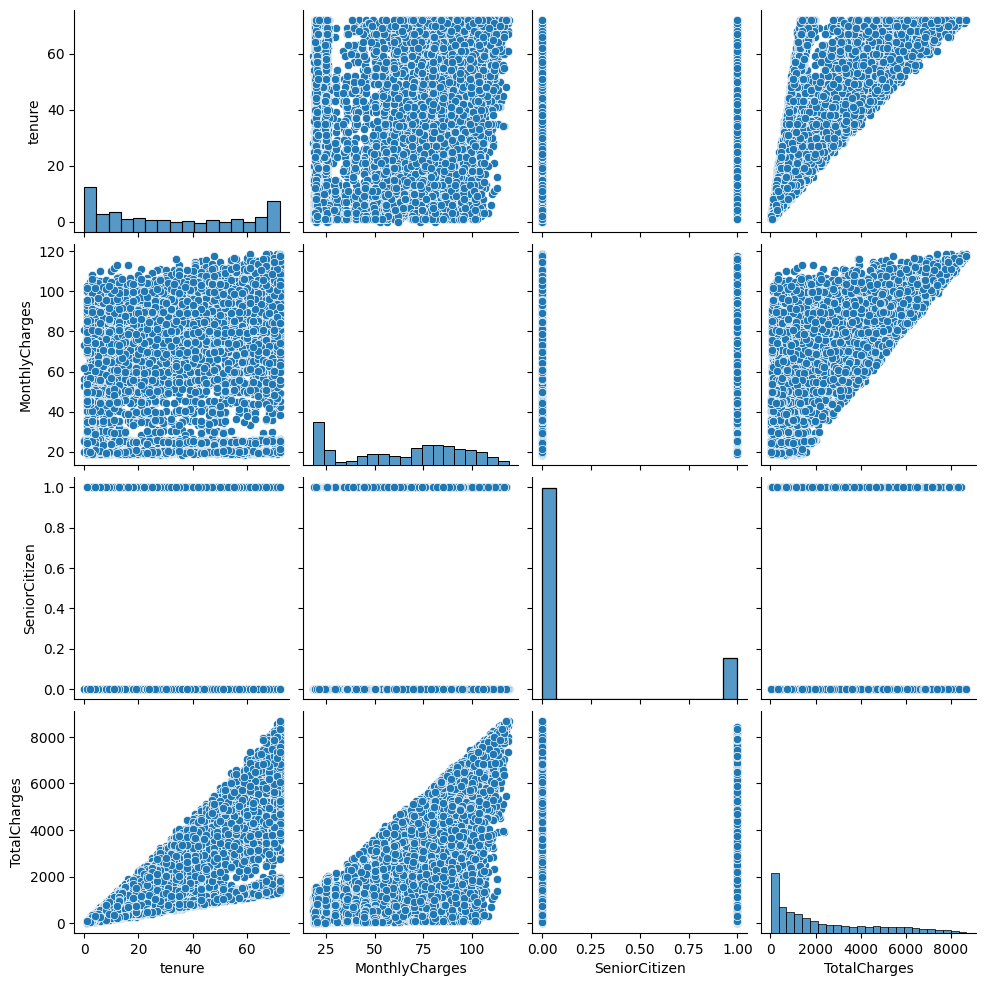

In [ ]:
sns.pairplot(df[numeric_cols])

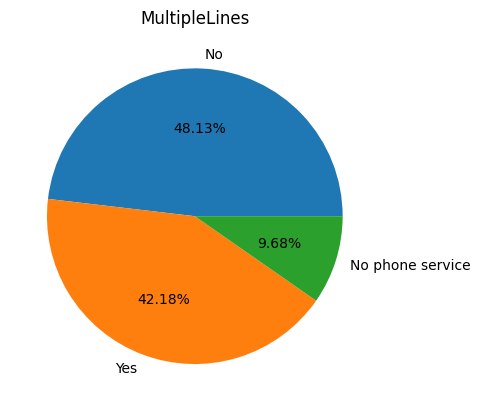

In [ ]:
plt.pie(df["MultipleLines"].value_counts(), labels=df["MultipleLines"].value_counts().index, autopct="%1.2f%%")
plt.title("MultipleLines")
plt.show()

<Axes: xlabel='InternetService', ylabel='MonthlyCharges'>

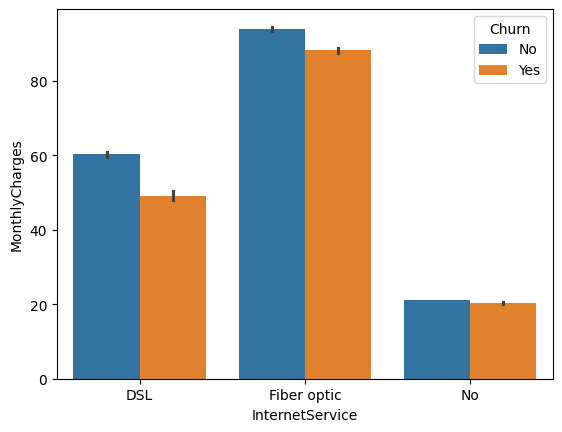

In [ ]:
sns.barplot(data=df, x="InternetService", y="MonthlyCharges",hue="Churn")

<Axes: xlabel='PhoneService', ylabel='tenure'>

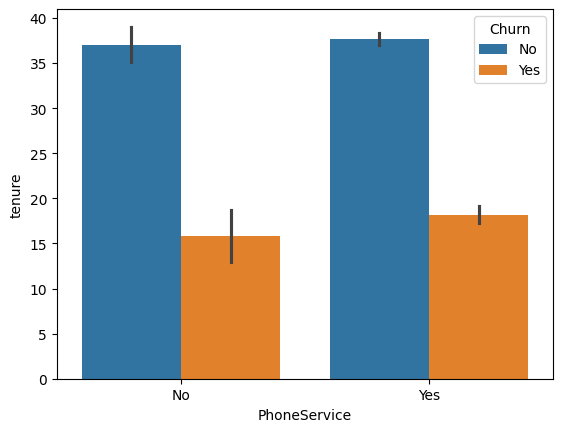

In [ ]:
sns.barplot(data=df, x="PhoneService",y='tenure',hue='Churn')

<Axes: xlabel='tenure', ylabel='Count'>

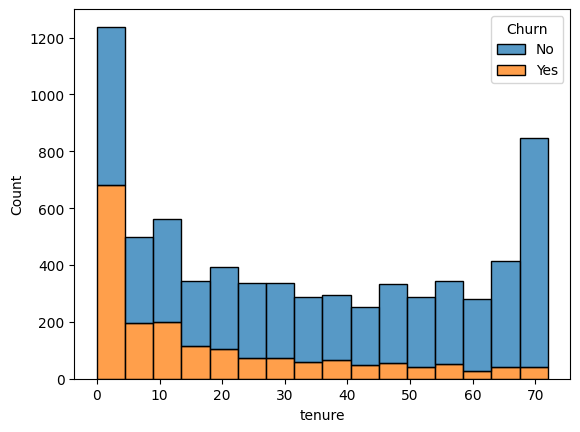

In [ ]:
sns.histplot(data=df, x="tenure", hue="Churn", multiple="stack")

In [ ]:
df['MonthlyCharges'].describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

In [ ]:
df['TotalCharges'].mean()

np.float64(2283.3004408418656)

<Axes: xlabel='Dependents', ylabel='MonthlyCharges'>

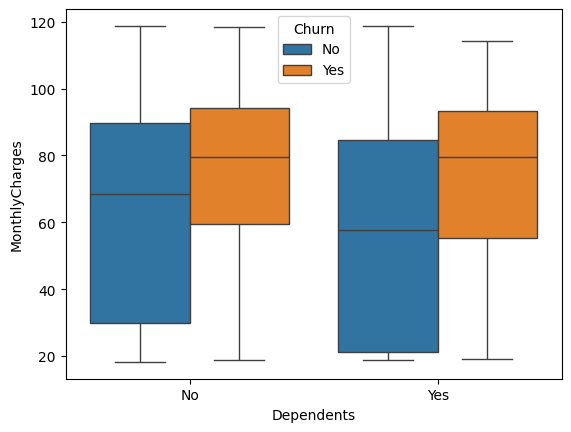

In [ ]:
sns.boxplot(data=df, x="Dependents",hue="Churn", y="MonthlyCharges")

<Axes: >

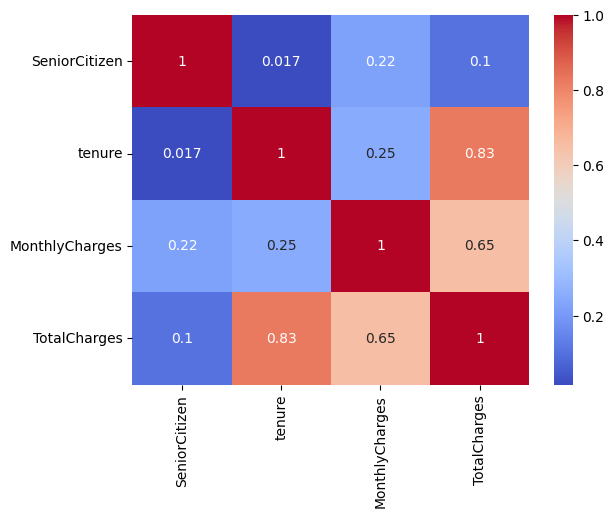

In [ ]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')

<Axes: xlabel='OnlineSecurity', ylabel='tenure'>

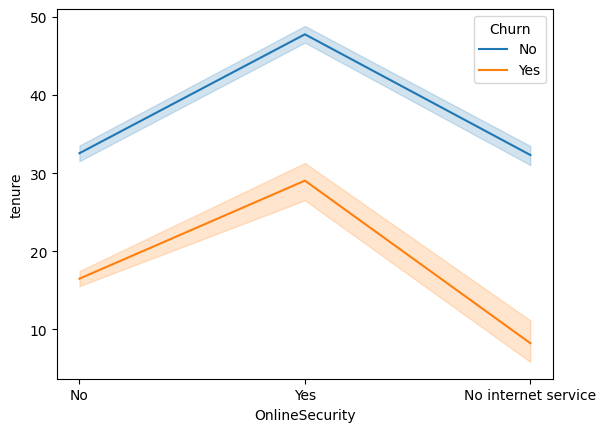

In [ ]:
sns.lineplot(data=df, y="tenure", x="OnlineSecurity",hue='Churn')

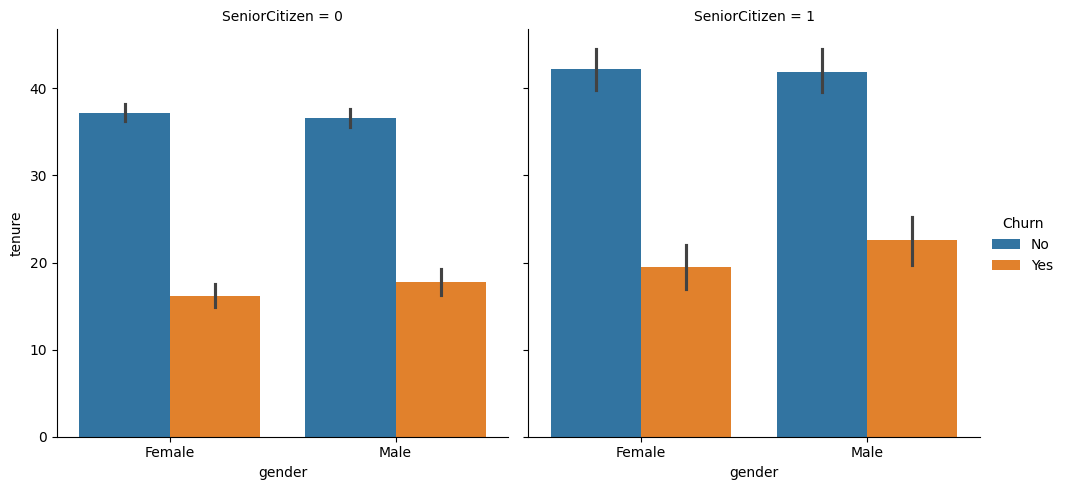

In [ ]:
sns.catplot(data=df, x='gender', y='tenure', hue='Churn', col='SeniorCitizen', kind='bar')
plt.show()

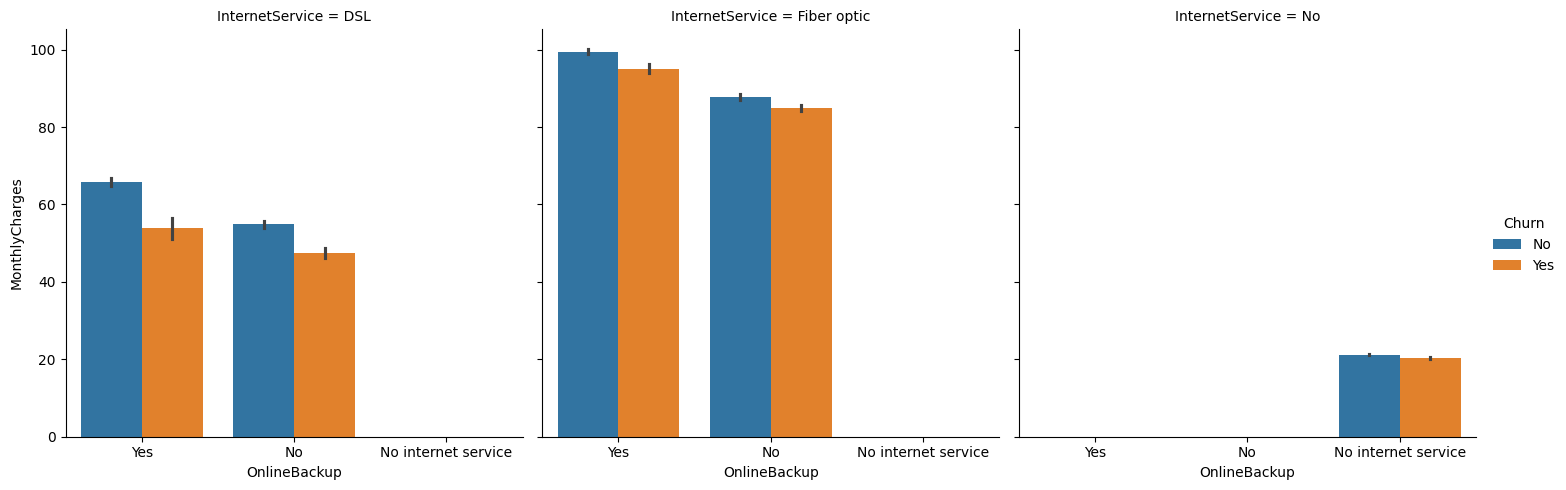

In [ ]:
sns.catplot(data=df,y='MonthlyCharges',x='OnlineBackup',col='InternetService',hue='Churn',kind='bar')

In [ ]:
df['Churn']=df['Churn'].str.strip().str.lower()
df['Churn']=df['Churn'].map({'yes':1,'no':0})
df['Churn']

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [ ]:
x=df.drop('Churn',axis=1)
y=df['Churn']

In [ ]:
x.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  
0              Yes           Electronic check           29.85         29.85  
1               No               Mailed check           56.95       1889.50  
2              Yes               Mailed check           53.85        108.15  
3               No  Bank transfer (automatic)           42.30       1840.75  
4              Yes           Electronic check           70.70        151.65

In [ ]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [ ]:
x_test,x_train,y_test,y_train=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
le=LabelEncoder()
scalar=StandardScaler()

# Identify categorical and numerical columns
categorical_cols = x_train.select_dtypes(include='object').columns
binary_cols = [col for col in categorical_cols if x_train[col].nunique() == 2]
nominal_cols = [col for col in categorical_cols if x_train[col].nunique() > 2]

# Impute missing values in TotalCharges before encoding and scaling
for df_subset in [x_train, x_test]:
    if 'TotalCharges' in df_subset.columns:
        df_subset['TotalCharges'] = df_subset['TotalCharges'].fillna(df_subset['TotalCharges'].mean())


# Apply Label Encoding to binary columns
for col in binary_cols:
    x_train[col] = le.fit_transform(x_train[col])
    x_test[col] = le.transform(x_test[col]) # Use transform for test set

# Apply One-Hot Encoding to nominal columns
x_train = pd.get_dummies(x_train, columns=nominal_cols, drop_first=True)
x_test = pd.get_dummies(x_test, columns=nominal_cols, drop_first=True)


for col in numeric_cols:
  if col in x_test.columns:
    x_test[col] = scalar.fit_transform(x_test[[col]])
  if col in x_train.columns:
    x_train[col] = scalar.fit_transform(x_train[[col]])

In [ ]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(x_test)

Now let's evaluate the model's performance using various metrics:

In [ ]:
accuracy_l = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report_l = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy_l}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report_l}")

Accuracy: 0.7987220447284346
Confusion Matrix:
[[3684  454]
 [ 680  816]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      4138
           1       0.64      0.55      0.59      1496

    accuracy                           0.80      5634
   macro avg       0.74      0.72      0.73      5634
weighted avg       0.79      0.80      0.79      5634



In [ ]:
r_model=RandomForestClassifier()
r_model.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred=r_model.predict(x_test)

In [ ]:
accuracy_r = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report_r = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy_r}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report_r}")

Accuracy: 0.784877529286475
Confusion Matrix:
[[3669  469]
 [ 743  753]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      4138
           1       0.62      0.50      0.55      1496

    accuracy                           0.78      5634
   macro avg       0.72      0.70      0.71      5634
weighted avg       0.77      0.78      0.78      5634



In [ ]:
d_model=DecisionTreeClassifier()
d_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred=d_model.predict(x_test)

In [ ]:
accuracy_d = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report_d = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy_d}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report_d}")

Accuracy: 0.7326943556975506
Confusion Matrix:
[[3340  798]
 [ 708  788]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      4138
           1       0.50      0.53      0.51      1496

    accuracy                           0.73      5634
   macro avg       0.66      0.67      0.66      5634
weighted avg       0.74      0.73      0.74      5634



In [ ]:
n_model=KNeighborsClassifier()
n_model.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred=n_model.predict(x_test)

In [ ]:
accuracy_k = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report_k = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy_k}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report_k}")

Accuracy: 0.7635782747603834
Confusion Matrix:
[[3473  665]
 [ 667  829]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      4138
           1       0.55      0.55      0.55      1496

    accuracy                           0.76      5634
   macro avg       0.70      0.70      0.70      5634
weighted avg       0.76      0.76      0.76      5634



In [ ]:
final=pd.DataFrame(
    {
        'Model':['Logistic Regression','Random Forest','Decision Tree','KNN'],
        'Accuracy':[accuracy_l, accuracy_r, accuracy_d, accuracy_k],
        'Confusion Matrix':[conf_matrix, conf_matrix, conf_matrix, conf_matrix]

    }
)
final

Model  Accuracy           Confusion Matrix
0  Logistic Regression  0.798722  [[3473, 665], [667, 829]]
1        Random Forest  0.784878  [[3473, 665], [667, 829]]
2        Decision Tree  0.732694  [[3473, 665], [667, 829]]
3                  KNN  0.763578  [[3473, 665], [667, 829]]

In [ ]:
from sklearn.metrics import f1_score, roc_auc_score

# Calculate metrics for Logistic Regression (model)
y_pred_lr = model.predict(x_test)
f1_lr = f1_score(y_test, y_pred_lr)
auc_lr = roc_auc_score(y_test, y_pred_lr)

# Calculate metrics for Random Forest (r_model)
y_pred_rf = r_model.predict(x_test)
f1_rf = f1_score(y_test, y_pred_rf)
auc_rf = roc_auc_score(y_test, y_pred_rf)

# Calculate metrics for Decision Tree (d_model)
y_pred_dt = d_model.predict(x_test)
f1_dt = f1_score(y_test, y_pred_dt)
auc_dt = roc_auc_score(y_test, y_pred_dt)

# Calculate metrics for KNN (n_model)
y_pred_knn = n_model.predict(x_test)
f1_knn = f1_score(y_test, y_pred_knn)
auc_knn = roc_auc_score(y_test, y_pred_knn)


results = pd.DataFrame({
    'Model': ['Logistic Regression','Random Forest','DecisionTreeClassifier','KNN',],
    'Accuracy': [accuracy_score(y_test, y_pred_lr), accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_dt), accuracy_score(y_test, y_pred_knn)],
    'F1 Score': [f1_lr, f1_rf, f1_dt, f1_knn],
    'ROC AUC': [auc_lr, auc_rf, auc_dt, auc_knn]
})

print(results.sort_values(by='F1 Score', ascending=False))

                    Model  Accuracy  F1 Score   ROC AUC
0     Logistic Regression  0.798722  0.590022  0.717870
3                     KNN  0.763578  0.554515  0.696719
1           Random Forest  0.784878  0.554084  0.695001
2  DecisionTreeClassifier  0.732694  0.511356  0.666946
